In [6]:
import os
import ccxt
from dotenv import load_dotenv
import pandas as pd
from datetime import datetime
load_dotenv()

True

In [2]:
API_KEY = os.getenv('BITGET_API_KEY')
SECRET_KEY = os.getenv('BITGET_SECRET_KEY')
PASSWORD = os.getenv('BITGET_PASSWORD')

In [7]:
# Initialize the Bitget exchange
bitget = ccxt.bitget({
    'apiKey': API_KEY,
    'secret': SECRET_KEY,
    'password': PASSWORD,
})

In [ ]:
symbol = 'SOL/USDT'
timeframe = '1h'  # 1-day candles
start = int(datetime(2021, 10, 1).timestamp() * 1000)  # Start date: January 1, 2020
end = int(datetime.now().timestamp() * 1000)  # Current time in milliseconds

In [27]:
symbol = 'SOL/USDT'
timeframe = '1h'  # 1-day candles
start = int(datetime(2021, 10, 1).timestamp() * 1000)  # Start date: January 1, 2020
end = int(datetime.now().timestamp() * 1000)  # Current time in milliseconds

# Fetch OHLCV data
all_ohlcv = []

while start < end:
    try:
        print(f"Fetching data start {datetime.fromtimestamp(start / 1000)}...")
        ohlcv = bitget.fetch_ohlcv(symbol, timeframe, start)
        if not ohlcv:
            break
        all_ohlcv.extend(ohlcv)
        start = ohlcv[-1][0] + 1  # Advance to the next timestamp
    except ccxt.BaseError as e:
        print(f"An error occurred: {e}")
        break

# Convert the data to a DataFrame
df = pd.DataFrame(all_ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')  # Convert timestamp to datetime

Fetching data start 2021-10-01 00:00:00...
Fetching data start 2021-10-05 03:00:00.001000...
Fetching data start 2021-10-09 06:00:00.001000...
Fetching data start 2021-10-13 09:00:00.001000...
Fetching data start 2021-10-17 12:00:00.001000...
Fetching data start 2021-10-21 15:00:00.001000...
Fetching data start 2021-10-25 18:00:00.001000...
Fetching data start 2021-10-29 21:00:00.001000...
Fetching data start 2021-11-03 00:00:00.001000...
Fetching data start 2021-11-07 03:00:00.001000...
Fetching data start 2021-11-11 06:00:00.001000...
Fetching data start 2021-11-15 09:00:00.001000...
Fetching data start 2021-11-19 12:00:00.001000...
Fetching data start 2021-11-23 15:00:00.001000...
Fetching data start 2021-11-27 18:00:00.001000...
Fetching data start 2021-12-01 21:00:00.001000...
Fetching data start 2021-12-06 00:00:00.001000...
Fetching data start 2021-12-10 03:00:00.001000...
Fetching data start 2021-12-14 06:00:00.001000...
Fetching data start 2021-12-18 09:00:00.001000...
Fetchin

In [28]:
df

timestamp     open     high      low    close      volume
0     2021-10-01 00:00:00  141.336  144.830  141.293  143.268    365.7400
1     2021-10-01 01:00:00  143.268  143.268  141.167  142.463    435.0200
2     2021-10-01 02:00:00  142.463  142.647  138.836  139.275    420.9300
3     2021-10-01 03:00:00  139.275  139.915  138.272  139.583    505.5700
4     2021-10-01 04:00:00  139.583  140.737  139.088  139.781    547.4300
...                   ...      ...      ...      ...      ...         ...
26528 2024-10-10 08:00:00  139.760  140.110  138.590  138.650  17845.0891
26529 2024-10-10 09:00:00  138.650  138.800  137.470  138.450  23295.4101
26530 2024-10-10 10:00:00  138.450  139.690  138.380  139.490  19949.5707
26531 2024-10-10 11:00:00  139.490  140.520  139.360  140.450  17177.1058
26532 2024-10-10 12:00:00  140.450  140.770  138.360  138.990  30894.7632

[26533 rows x 6 columns]

In [29]:
df['upper_wick'] = df['high'] - df[['open', 'close']].max(axis=1)
df.head()

timestamp     open     high      low    close  volume  upper_wick
0 2021-10-01 00:00:00  141.336  144.830  141.293  143.268  365.74       1.562
1 2021-10-01 01:00:00  143.268  143.268  141.167  142.463  435.02       0.000
2 2021-10-01 02:00:00  142.463  142.647  138.836  139.275  420.93       0.184
3 2021-10-01 03:00:00  139.275  139.915  138.272  139.583  505.57       0.332
4 2021-10-01 04:00:00  139.583  140.737  139.088  139.781  547.43       0.956

In [30]:
# Count the days where the wick is greater than zero
days_with_positive_wick = df[df['upper_wick'] > 0].shape[0]

print(f"Number of days with a wick greater than zero: {days_with_positive_wick}")

Number of days with a wick greater than zero: 25744


In [31]:
df['upper_wick_pct'] = ((df['high'] - df['close']) / df['close']) * 100

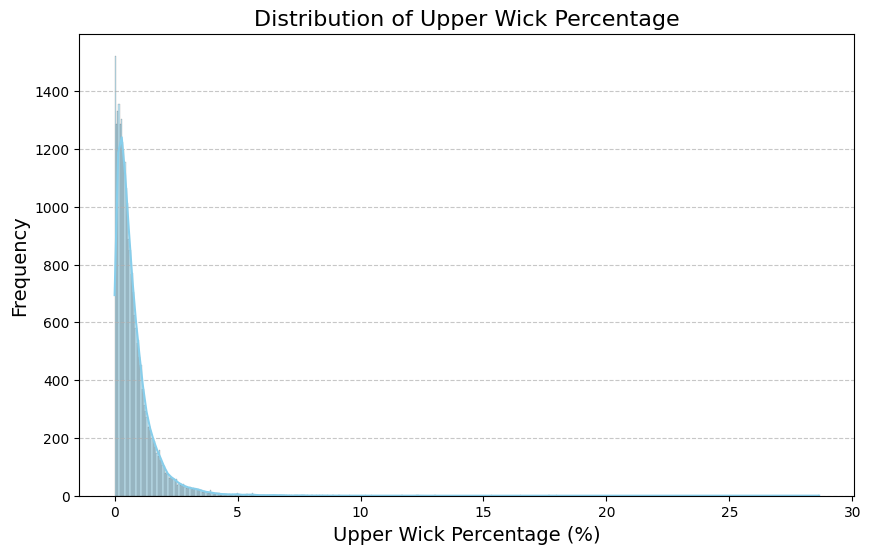

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the distribution of upper_wick_pct
plt.figure(figsize=(10, 6))
sns.histplot(df['upper_wick_pct'], kde=True, color='skyblue')
plt.title('Distribution of Upper Wick Percentage', fontsize=16)
plt.xlabel('Upper Wick Percentage (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [33]:
df['upper_wick'][df['close'] <  df['open']]

1        0.000
2        0.184
6        0.475
9        0.053
12       2.626
         ...  
26526    0.140
26527    0.000
26528    0.350
26529    0.150
26532    0.320
Name: upper_wick, Length: 13280, dtype: float64

In [34]:
import plotly.graph_objects as go
# Create a candlestick chart using Plotly
fig = go.Figure(data=[go.Candlestick(
    x=df['timestamp'],
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    increasing_line_color='green',  # Green for price increase
    decreasing_line_color='red',    # Red for price decrease
)])
# Customize layout
fig.update_layout(
    title='Candlestick Chart of Price',
    xaxis_title='Date',
    yaxis_title='Price (USDT)',
    template='plotly_dark',  # Set a dark theme for the plot
    xaxis_rangeslider_visible=False  # Optionally hide the range slider
)

# Show the plot
fig.show()

In [35]:
import pendulum

In [36]:
start = int(datetime(2021, 10, 1).timestamp() * 1000)  # Start date: January 1, 2020
end = int(datetime.now().timestamp() * 1000)  # Current time in milliseconds

In [118]:
date = pd.date_range(start='2020-01-01', end='2020-02-01', freq="100d")
date



DatetimeIndex(['2020-01-01'], dtype='datetime64[ns]', freq='100D')

In [124]:
import pandas as pd

# Initialize an empty list to collect data
all_data = []

# Generate the date range with 100h frequency (100 hours)
date = pd.date_range(start='2020-01-01', end='2020-02-01', freq="100h")  # 100h frequency

# Loop through the date range
for d in date:
    since = int(d.timestamp() * 1000)  # Convert to milliseconds
    new_ohlcv = bitget.fetch_ohlcv('BTC/USDT', '1h', since=since, limit=100)

    # Convert to DataFrame
    df = pd.DataFrame(new_ohlcv, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
    df['date'] = pd.to_datetime(df['date'], unit='ms')  # Convert the 'date' column to datetime
    df.set_index('date', inplace=True)
    
    # Append the current DataFrame to the list
    all_data.append(df)

# Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(all_data)

# Sort the final DataFrame by date
final_df = final_df.sort_index(ascending=True)

# Print the final DataFrame
print(final_df)


                        open     high      low    close     volume
date                                                              
2020-01-01 00:00:00  7195.72  7195.89  7175.47  7176.69  1243.8017
2020-01-01 01:00:00  7176.69  7227.85  7175.98  7215.16  1281.5695
2020-01-01 02:00:00  7215.16  7243.92  7211.67  7242.81   595.8804
2020-01-01 03:00:00  7242.81  7244.66  7220.15  7226.03   692.9066
2020-01-01 04:00:00  7226.03  7229.98  7215.15  7217.27  1175.7190
...                      ...      ...      ...      ...        ...
2020-02-03 03:00:00  9375.67  9396.87  9335.10  9386.84  2815.9195
2020-02-03 04:00:00  9386.84  9405.26  9368.79  9392.59  1909.3360
2020-02-03 05:00:00  9392.59  9425.19  9388.24  9401.88  2073.8818
2020-02-03 06:00:00  9401.88  9416.69  9385.02  9395.46  1840.7836
2020-02-03 07:00:00  9395.46  9396.10  9346.75  9372.64  2517.1932

[800 rows x 5 columns]


In [147]:
date = pd.date_range(start='2020-01-01', end='2021-01-1', freq="100min")
since = int(date[1].timestamp() * 1000)
new_ohlcv = bitget.fetch_ohlcv('BTC/USDT', '1m', since=since, limit=100)
df = pd.DataFrame(new_ohlcv, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
df['date'] = pd.to_datetime(df['date'], unit='ms')
df.set_index('date', inplace=True)
df = df.sort_index(ascending=True)
df

open     high      low    close   volume
date                                                            
2020-01-01 01:40:00  7216.00  7219.04  7214.87  7215.74  61.7245
2020-01-01 01:41:00  7215.74  7217.75  7212.17  7212.17  50.4344
2020-01-01 01:42:00  7212.17  7214.24  7211.30  7211.60  57.8508
2020-01-01 01:43:00  7211.60  7215.31  7207.20  7213.56  26.5311
2020-01-01 01:44:00  7213.56  7213.56  7211.79  7212.71   2.4416
...                      ...      ...      ...      ...      ...
2020-01-01 03:15:00  7228.04  7228.73  7227.22  7228.41   1.4371
2020-01-01 03:16:00  7228.41  7229.91  7228.06  7228.73   1.0209
2020-01-01 03:17:00  7228.73  7233.72  7228.73  7233.72   1.2613
2020-01-01 03:18:00  7233.72  7235.19  7232.83  7234.96   4.3228
2020-01-01 03:19:00  7234.96  7234.96  7230.53  7234.59   4.1203

[100 rows x 5 columns]

In [140]:
5 * 100 

500

In [74]:
df = pd.DataFrame(ohlcv, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
df['date'] = pd.to_datetime(df['date'], unit='ms')
df.set_index('date', inplace=True)
df = df.sort_index(ascending=True)

df.head()

open      high       low     close    volume
date                                                                 
2019-07-23 18:40:00  10121.33  10122.14  10083.94  10111.65  431.8477
2019-07-23 18:45:00  10111.65  10116.60  10078.27  10087.44  462.1562
2019-07-23 18:50:00  10087.44  10099.86  10079.71  10083.21  377.2699
2019-07-23 18:55:00  10083.21  10105.04  10081.98  10095.29  282.6723
2019-07-23 19:00:00  10095.29  10125.24  10091.91  10111.19  294.1665

In [75]:
df.tail()

open     high      low    close    volume
date                                                             
2019-07-24 10:55:00  9674.01  9710.09  9674.01  9702.49  360.9172
2019-07-24 11:00:00  9702.49  9703.86  9624.73  9624.73  288.3634
2019-07-24 11:05:00  9624.73  9658.78  9623.67  9628.57  257.3543
2019-07-24 11:10:00  9628.57  9658.85  9624.21  9642.59  339.2590
2019-07-24 11:15:00  9642.59  9687.95  9631.90  9684.04  427.8071

In [148]:
class OHLCVDataFetcher:
    def __init__(self, start_date, end_date, symbol, interval, freq="100h", limit=100):
        """
        Initializes the OHLCV data fetcher.
        
        :param start_date: Start date of the range (string in 'YYYY-MM-DD' format)
        :param end_date: End date of the range (string in 'YYYY-MM-DD' format)
        :param symbol: Trading pair symbol (e.g., 'BTC/USDT')
        :param interval: Interval for the OHLCV data (e.g., '1h')
        :param freq: Frequency for the date range (default is '100h')
        :param limit: Number of data points to fetch per request (default is 100)
        """
        self.start_date = start_date
        self.end_date = end_date
        self.symbol = symbol
        self.interval = interval
        self.freq = freq
        self.limit = limit
        self.all_data = []

    def fetch_data(self):
        """
        Fetches OHLCV data in chunks and stores it in the `all_data` list.
        """
        # Generate the date range with the specified frequency
        date_range = pd.date_range(start=self.start_date, end=self.end_date, freq=self.freq)

        # Loop through the date range and fetch data in chunks
        for d in date_range:
            since = int(d.timestamp() * 1000)  # Convert to milliseconds
            new_ohlcv = bitget.fetch_ohlcv(self.symbol, self.interval, since=since, limit=self.limit)

            # Convert to DataFrame
            df = pd.DataFrame(new_ohlcv, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
            df['date'] = pd.to_datetime(df['date'], unit='ms')  # Convert 'date' column to datetime
            df.set_index('date', inplace=True)

            # Append the current DataFrame to the list
            self.all_data.append(df)

    def get_final_data(self):
        """
        Concatenates the collected data into a single DataFrame and sorts it by date.
        
        :return: A DataFrame containing the combined OHLCV data
        """
        # Concatenate all DataFrames into a single DataFrame
        final_df = pd.concat(self.all_data)

        # Sort the final DataFrame by date
        final_df = final_df.sort_index(ascending=True)

        return final_df

# Example usage
fetcher = OHLCVDataFetcher(start_date='2020-01-01', end_date='2024-12-25', symbol='SOL/USDT', interval='1h')

# Fetch data
fetcher.fetch_data()

# Get the final DataFrame with all the data
final_df = fetcher.get_final_data()

/tmp/ipykernel_231795/3047142838.py:48: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [149]:
final_df

open     high      low    close      volume
date                                                               
2021-06-22 08:00:00   26.145   26.178   24.552   24.927    500.5874
2021-06-22 09:00:00   24.891   25.165   23.530   24.239   1120.5429
2021-06-22 10:00:00   24.197   24.782   22.990   23.935   1758.0300
2021-06-22 11:00:00   24.003   24.170   21.995   21.998   1096.3400
2021-06-22 12:00:00   22.054   22.828   20.606   22.293   1247.2100
...                      ...      ...      ...      ...         ...
2024-12-25 16:00:00  198.270  198.780  196.150  197.460  19292.0759
2024-12-25 17:00:00  197.460  198.840  196.580  198.840  13862.0693
2024-12-25 18:00:00  198.840  199.260  197.950  198.240  10375.4047
2024-12-25 19:00:00  198.240  199.430  198.210  199.240  11289.3119
2024-12-25 20:00:00  199.240  200.090  197.700  198.050  12541.4011

[30280 rows x 5 columns]